In [2]:
from dictionary_graph import DictionaryGraph
import pandas as pd
import numpy as np
from scipy.sparse.linalg import eigsh
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
def similarity_projector(A, B):
    B = B.toarray()
    M = np.kron(A, B) + np.kron(A.T, B.T)
    Z = np.full((A.shape[0] * B.shape[0], 1), 1)
    eigenvalues, V = eigsh(M, k=2)
    assert np.isclose(np.dot(V[:,0], V[:,1]), 0)
    P = V@V.T
    assert(np.allclose(P, P@P))
    L = P@Z
    L = L / np.linalg.norm(L, 'fro')
    return L.reshape(A.shape[0], B.shape[0]).T

In [4]:
graph = DictionaryGraph('OPTED', 'a-z')
def get_synonyms_projector(word, n=10, **kwargs):
    N = n
    vertices, adjacency_matrix = graph.adjacency_matrix(word, **kwargs)
    S = pd.DataFrame(similarity_projector(
        np.array([
            [0, 1, 0],
            [0, 0, 1],
            [0, 0, 0],
        ], dtype=np.float64),
        adjacency_matrix))
    draw_graph(adjacency_matrix, n, vertices, S[1].index.tolist())
    return S[1].nlargest(n)

def draw_graph(adjacency_matrix, n, vertices, indices):    
    A = adjacency_matrix.toarray()           
    g = nx.from_numpy_matrix(A,create_using=nx.MultiDiGraph())
    g = g.subgraph(indices)
    g = nx.relabel_nodes(g, vertices.to_dict())  
    nx.draw(g,pos=nx.circular_layout(g),with_labels=True,node_size=4000)

3    0.298059
2    0.296512
5    0.262841
6    0.205042
1    0.200979
0    0.187038
4    0.129616
Name: 1, dtype: float64


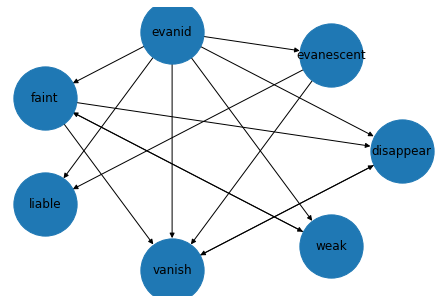

In [7]:
print(get_synonyms_projector('evanid', method=1, f=None))

4     0.574275
3     0.071429
9     0.015288
2     0.013716
5     0.007403
10    0.001827
6     0.001704
1     0.000233
0     0.000014
8     0.000010
Name: 1, dtype: float64


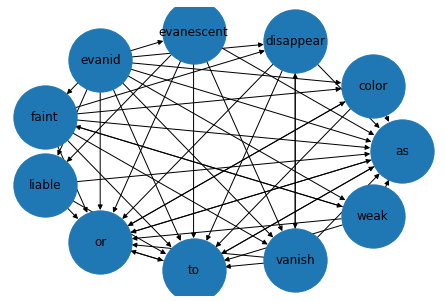

In [69]:
print(get_synonyms_projector('evanid', method=2, f=None))

4     0.533253
3     0.201976
9     0.101096
2     0.077032
5     0.074550
10    0.027173
6     0.023762
1     0.007854
0     0.002347
8     0.001967
Name: 1, dtype: float64


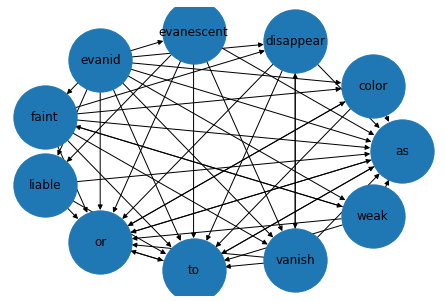

In [68]:
print(get_synonyms_projector('evanid', method=2, f=np.sqrt))

4     0.524652
3     0.175127
9     0.113177
5     0.102086
2     0.088259
10    0.056561
6     0.049327
1     0.035615
7     0.032490
0     0.031611
Name: 1, dtype: float64


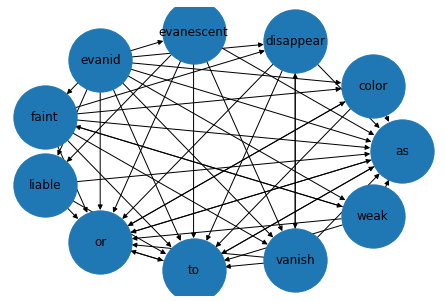

In [67]:
print(get_synonyms_projector('evanid', method=2, f=lambda x: np.log(1+x)))